# SVM Implementation


Today we are going to be implementing SVM. Our study will be on a US crime dataset found here: https://github.com/EpistasisLab/pmlb/blob/master/datasets/1089_USCrime/1089_USCrime.tsv.gz <br>
The target is as described "The number of families per 1000 earning below 1/2 the median income."

In [1]:
import os 
path=os.getcwd()
parent_dir = os.path.dirname(path)
print(parent_dir)
path = "datasets/1089_USCrime.tsv"
joined = os.path.join(parent_dir, path)
print(joined)

/Users/jojo/Downloads/Developer
/Users/jojo/Downloads/Developer/datasets/1089_USCrime.tsv


In [2]:
import pandas as pd
data = pd.read_csv(joined, sep='\t')

In [3]:
data.head()

,R,Age,S,Ed,Ex0,Ex1,LF,M,N,NW,U1,U2,W,target
0,79.099998,151.0,1.0,91.0,58.0,56.0,510.0,950.0,33.0,301.0,108.0,41.0,394.0,261.0
1,163.500000,143.0,0.0,113.0,103.0,95.0,583.0,1012.0,13.0,102.0,96.0,36.0,557.0,194.0
2,57.799999,142.0,1.0,89.0,45.0,44.0,533.0,969.0,18.0,219.0,94.0,33.0,318.0,250.0
3,196.899994,136.0,0.0,121.0,149.0,141.0,577.0,994.0,157.0,80.0,102.0,39.0,673.0,167.0
4,123.400002,141.0,0.0,121.0,109.0,101.0,591.0,985.0,18.0,30.0,91.0,20.0,578.0,174.0


In [4]:
data.describe()

,R,Age,S,Ed,Ex0,Ex1,LF,M,N,NW,U1,U2,W,target
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,90.508511,138.574468,0.340426,105.638298,85.000000,80.234043,561.191489,983.021277,36.617021,101.127660,95.468085,33.978723,525.382979,194.000000
std,38.676269,12.567634,0.478975,11.186999,29.718974,27.961319,40.411814,29.467365,38.071188,102.828819,18.028783,8.445450,96.490944,39.896061
min,34.200001,119.000000,0.000000,87.000000,45.000000,41.000000,480.000000,934.000000,3.000000,2.000000,70.000000,20.000000,288.000000,126.000000
25%,65.850002,130.000000,0.000000,97.500000,62.500000,58.500000,530.500000,964.500000,10.000000,24.000000,80.500000,27.500000,459.500000,165.500000
50%,83.099998,136.000000,0.000000,108.000000,78.000000,73.000000,560.000000,977.000000,25.000000,76.000000,92.000000,34.000000,537.000000,176.000000
75%,105.750000,146.000000,1.000000,114.500000,104.500000,97.000000,593.000000,992.000000,41.500000,132.500000,104.000000,38.500000,591.500000,227.500000
max,199.300003,177.000000,1.000000,122.000000,166.000000,157.000000,641.000000,1071.000000,168.000000,423.000000,142.000000,58.000000,689.000000,276.000000


In [5]:
data.isnull().sum()

R         0
Age       0
S         0
Ed        0
Ex0       0
Ex1       0
LF        0
M         0
N         0
NW        0
U1        0
U2        0
W         0
target    0
dtype: int64

Renaming all of the columns for clarity <br>Ex0( is the 1960 per capita expenditure on police by state and local government)<br>Ex1(1959 per capita expenditure on police by state and local government) <br> Ed (Mean number of years of schooling x 10 for persons of age 25 or older )

In [6]:
data = data.rename(columns={'R': 'Crime Rate', "S": "Southern states", "Ed": "Education", "M": "Males", "N":"State Population", "NW": "Non-whites", "U1": "Unemployment", "U2": "Unemployment2", "W": "Median Income","U1": "unemployment1", "U2": "unemployment2", "W": "Median assets", "LF": "Labor force"})

In [7]:
target_description = data['target'].describe()
print(target_description)

count     47.000000
mean     194.000000
std       39.896061
min      126.000000
25%      165.500000
50%      176.000000
75%      227.500000
max      276.000000
Name: target, dtype: float64


In [8]:
data.head(20)

,Crime Rate,Age,Southern states,Education,Ex0,Ex1,Labor force,Males,State Population,Non-whites,unemployment1,unemployment2,Median assets,target
0,79.099998,151.0,1.0,91.0,58.0,56.0,510.0,950.0,33.0,301.0,108.0,41.0,394.0,261.0
1,163.500000,143.0,0.0,113.0,103.0,95.0,583.0,1012.0,13.0,102.0,96.0,36.0,557.0,194.0
2,57.799999,142.0,1.0,89.0,45.0,44.0,533.0,969.0,18.0,219.0,94.0,33.0,318.0,250.0
3,196.899994,136.0,0.0,121.0,149.0,141.0,577.0,994.0,157.0,80.0,102.0,39.0,673.0,167.0
4,123.400002,141.0,0.0,121.0,109.0,101.0,591.0,985.0,18.0,30.0,91.0,20.0,578.0,174.0
5,68.199997,121.0,0.0,110.0,118.0,115.0,547.0,964.0,25.0,44.0,84.0,29.0,689.0,126.0
6,96.300003,127.0,1.0,111.0,82.0,79.0,519.0,982.0,4.0,139.0,97.0,38.0,620.0,168.0
7,155.500000,131.0,1.0,109.0,115.0,109.0,542.0,969.0,50.0,179.0,79.0,35.0,472.0,206.0
8,85.599998,157.0,1.0,90.0,65.0,62.0,553.0,955.0,39.0,286.0,81.0,28.0,421.0,239.0
9,70.500000,140.0,0.0,118.0,71.0,68.0,632.0,1029.0,7.0,15.0,100.0,24.0,526.0,174.0


In [9]:
y = data['target']
X = data.drop('target' ,axis=1)

<Axes: >

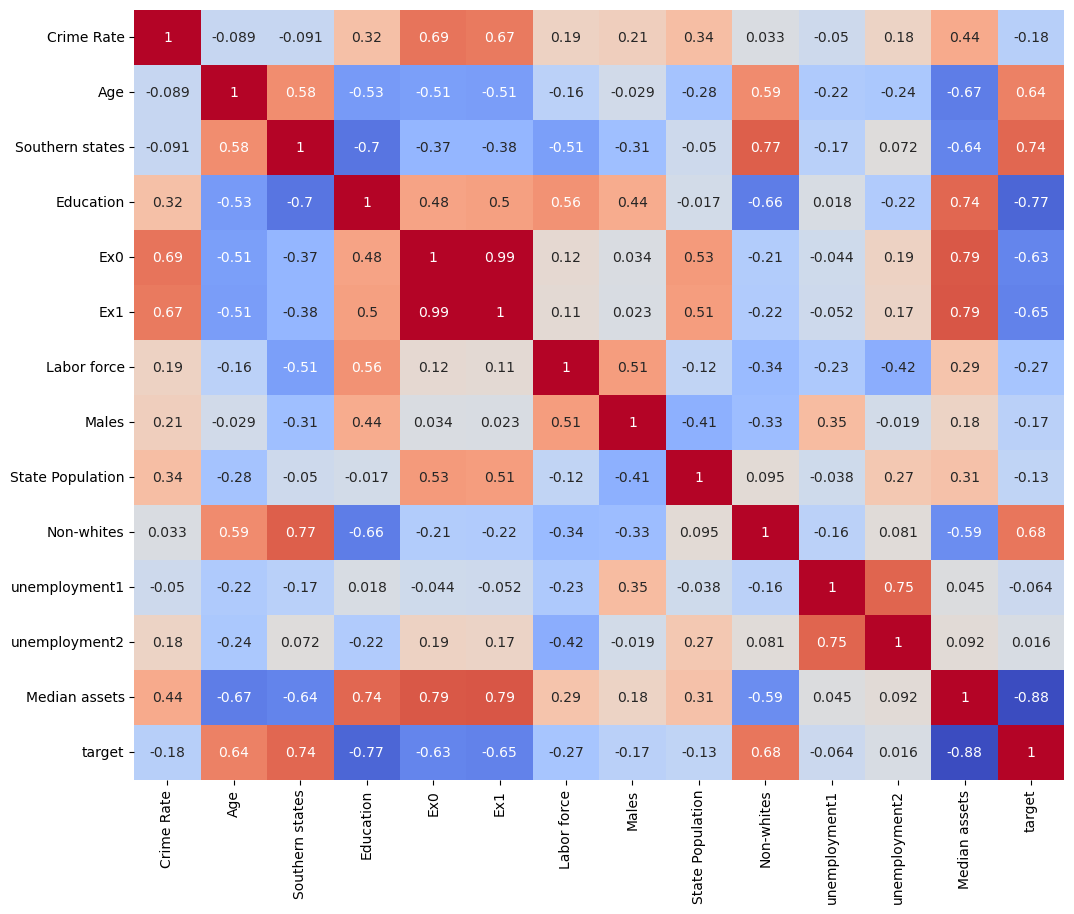

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cbar=False, cmap='coolwarm')

## Training the model

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Standardize the training data
svr = SVR()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
svr.fit(X_train_scaled, y_train)
y_train_pred = svr.predict(X_train_scaled)
y_test_pred = svr.predict(X_test_scaled)

In [14]:
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print('Training Set Metrics:')
print('Mean Squared Error:', mse_train)
print('Mean Absolute Error:', mae_train)
print('R^2:', r2_train)

# Calculate the accuracy of the SVR model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)
print('Testing Set Metrics:')
print('Mean Squared Error:', mse_test)
print('Mean Absolute Error:', mae_test)
print('R^2:', r2_test)

Training Set Metrics:
Mean Squared Error: 1744.5567064200163
Mean Absolute Error: 32.361195117984686
R^2: -0.06141488812492657
Testing Set Metrics:
Mean Squared Error: 1292.7714915068061
Mean Absolute Error: 29.522008653572517
R^2: -0.06738291514482508


## Hypertuning the model

In [15]:
from sklearn.model_selection import GridSearchCV
svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000, 200000, 250000],
    'gamma': [0.004, 0.0045, 0.005]
}

svr_cv = GridSearchCV(svr, svrgs_parameters, cv=8,
                      scoring='neg_mean_squared_log_error')


In [16]:
svr_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [150000, 200000, 250000],
                         'gamma': [0.004, 0.0045, 0.005], 'kernel': ['rbf']},
             scoring='neg_mean_squared_log_error')

In [17]:
print('Best Parameters:', svr_cv.best_params_)

Best Parameters: {'C': 150000, 'gamma': 0.005, 'kernel': 'rbf'}


In [18]:
import numpy as np
best_svr = svr_cv.best_estimator_
y_pred = best_svr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Best Hyperparameters: {svr_cv.best_params_}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Best Hyperparameters: {'C': 150000, 'gamma': 0.005, 'kernel': 'rbf'}
Mean Squared Error (MSE): 419.0641426316353
Mean Absolute Error (MAE): 17.261419356845884
Root Mean Squared Error (RMSE): 20.47105621680609


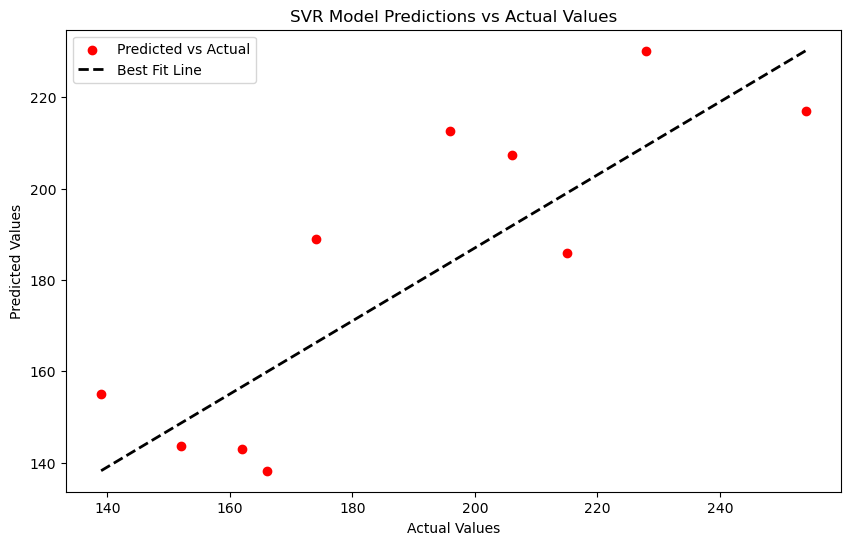

In [19]:


plt.figure(figsize=(10, 6))
# Plot the actual vs predicted values
plt.scatter(y_test, y_pred, color='red', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()],
         'k--', lw=2, label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('SVR Model Predictions vs Actual Values')
plt.legend()
plt.show()